## 模型設計

#### 首先將 array 長度上限調整為200   (我覺得要200字才足以判斷XD)

#### Optimizer 設為 NAdam，有測試過在相同參數下所得的預測表現比 Adam 好 (但也只好一點點XD)

#### 由於測試過程中發現即使 Training 的 accuracy 高到 94%，Testing 的 accuracy 卻只有約 84%，因此懷疑有 Overfitting 的現象

#### 設立 Dropout，以避免 overfitting

#### batch size = 32 , echo = 5 (皆同上課)

In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import imdb

Using TensorFlow backend.


#### 決定只要10000字

In [86]:
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=10000)

In [5]:
print("訓練資料總筆數:",len(x_train))
print("測試資料總筆數:",len(x_test))

訓練資料總筆數: 25000
測試資料總筆數: 25000


In [6]:
x_train[24999]

[1,
 17,
 6,
 194,
 337,
 7,
 4,
 204,
 22,
 45,
 254,
 8,
 106,
 14,
 123,
 4,
 2,
 270,
 2,
 5,
 2,
 2,
 732,
 2098,
 101,
 405,
 39,
 14,
 1034,
 4,
 1310,
 9,
 115,
 50,
 305,
 12,
 47,
 4,
 168,
 5,
 235,
 7,
 38,
 111,
 699,
 102,
 7,
 4,
 4039,
 9245,
 9,
 24,
 6,
 78,
 1099,
 17,
 2345,
 2,
 21,
 27,
 9685,
 6139,
 5,
 2,
 1603,
 92,
 1183,
 4,
 1310,
 7,
 4,
 204,
 42,
 97,
 90,
 35,
 221,
 109,
 29,
 127,
 27,
 118,
 8,
 97,
 12,
 157,
 21,
 6789,
 2,
 9,
 6,
 66,
 78,
 1099,
 4,
 631,
 1191,
 5,
 2642,
 272,
 191,
 1070,
 6,
 7585,
 8,
 2197,
 2,
 2,
 544,
 5,
 383,
 1271,
 848,
 1468,
 2,
 497,
 2,
 8,
 1597,
 8778,
 2,
 21,
 60,
 27,
 239,
 9,
 43,
 8368,
 209,
 405,
 10,
 10,
 12,
 764,
 40,
 4,
 248,
 20,
 12,
 16,
 5,
 174,
 1791,
 72,
 7,
 51,
 6,
 1739,
 22,
 4,
 204,
 131,
 9]

#### 根據 information theory 根據每個字出現的頻率決定數字，1就是第一多次的字

In [87]:
len(x_train[24999])

153

In [8]:
len(x_train[9982])

156

In [9]:
len(x_train[9987])

271

In [10]:
y_train[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [11]:
y_train[24999]

0

#### 雖然RNN可以不定長度輸入，但無法變成array的形式，因此會使變成一樣的長度。先決最長的文字為上限，太短就補0。相信200字內足以判斷正負評。

In [12]:
from keras.preprocessing import sequence

In [88]:
x_train = sequence.pad_sequences(x_train,maxlen=200)
x_test = sequence.pad_sequences(x_test,maxlen=200)

In [89]:
x_train.shape

(25000, 200)

#### 由於一開始決定10000字所以有10000維(one-hot encoding)，因此要先壓成N維，可以用LSTM訓練成N維，因此需要決定要壓成幾維(Embedding)。以及決定LSTM要幾個神經元。最後用sigmoid輸出，偏向0即是負評。

In [158]:
N = 150 #文字要壓到N維
K = 20 #LSTM有K個神經元

In [159]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout
from keras.layers import LSTM
from keras.optimizers import SGD, Adam, Adamax, Nadam, Adadelta, Adagrad, RMSprop

In [160]:
model = Sequential()

In [161]:
model.add(Embedding(10000,N))
model.add(Dropout(0.5))

#### 輸入即是 Embedding 成幾維

In [162]:
model.add(LSTM(K))

In [163]:
model.add(Dropout(0.5))

In [164]:
model.add(Dense(1,activation="sigmoid"))

#### 組裝

In [165]:
model.compile(loss="binary_crossentropy",optimizer="nadam"
             ,metrics=["accuracy"])

In [166]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, None, 150)         1500000   
_________________________________________________________________
dropout_11 (Dropout)         (None, None, 150)         0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 20)                13680     
_________________________________________________________________
dropout_12 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 21        
Total params: 1,513,701
Trainable params: 1,513,701
Non-trainable params: 0
_________________________________________________________________


In [167]:
model_1 =model.fit(x_train,y_train,batch_size =32,epochs = 4,validation_data = (x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 105s 4ms/step - loss: 0.4577 - acc: 0.7910 - val_loss: 0.3434 - val_acc: 0.8570
Epoch 2/4
25000/25000 [==============================] - 105s 4ms/step - loss: 0.2899 - acc: 0.8899 - val_loss: 0.3918 - val_acc: 0.8124
Epoch 3/4
25000/25000 [==============================] - 103s 4ms/step - loss: 0.2184 - acc: 0.9197 - val_loss: 0.3315 - val_acc: 0.8730
Epoch 4/4
25000/25000 [==============================] - 105s 4ms/step - loss: 0.1662 - acc: 0.9424 - val_loss: 0.3804 - val_acc: 0.8707


### Training data accuracy plot

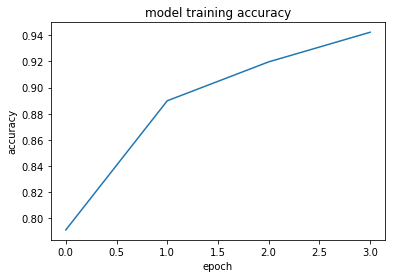

In [170]:
plt.plot(model_1.history["acc"])
plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.show()

### Testing data accuracy plot

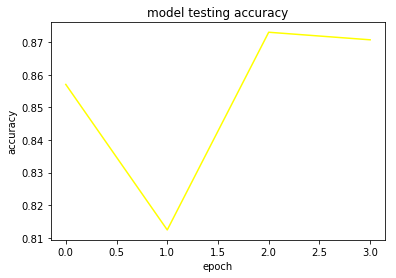

In [171]:
plt.plot(model_1.history["val_acc"],color="yellow")
plt.title("model testing accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.show()

### 結果：測試資料預測率 0.87072

In [168]:
score = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 16s 648us/step


In [169]:
print(f'測試資料的 loss = {score[0]}')
print(f'測試資正確率 = {score[1]}')

測試資料的 loss = 0.38040001567602155
測試資正確率 = 0.87072


### 最終參數設置

#### Activation function: NAdam

#### N (input維度) = 150

#### K (LSTM數目) = 20

#### Dropout 各自設立在 Embedding 與 LSTM 後面，dropout 率均設為 0.5

### 總結

    可以從 trainin 與 testing 的 accuracy 趨勢圖中看出兩者並沒有明顯的單調正向關係，說明了 training 後可能有 overfitting 的問題，導致 testing 的預測表現不如預期。
    此外，在我測試的過程中，發現將LSTM數目一直增加並未能明顯地提升預測率，反而input維度(N)增加較能改善預測表現。我覺得可能原因在於原X資料為10000維度的one-hot encoding，若壓縮成太小的維度可能會損失訊息量，導致model訓練不好，但壓太少計算的量又太多且可能會有 overfitting，因此N的選擇我覺得在這筆資料的分析上格外重要。另外，training 次數太多也會有 overfitting 產生 (可由trainin 與 testing 的 accuracy 趨勢圖看出)。